# dataset load 01

In [4]:
import tensorflow as tf
import numpy as np

train_x = np.arange(20).astype(np.float32).reshape(-1,1)
train_y = 3*train_x + 1

train_ds = tf.data.Dataset.from_tensor_slices((train_x, train_y))
train_ds = train_ds.shuffle(100).batch(32)

for x, y in train_ds:
    print(x.shape)
    print(y.shape, '\n')

(20, 1)
(20, 1) 



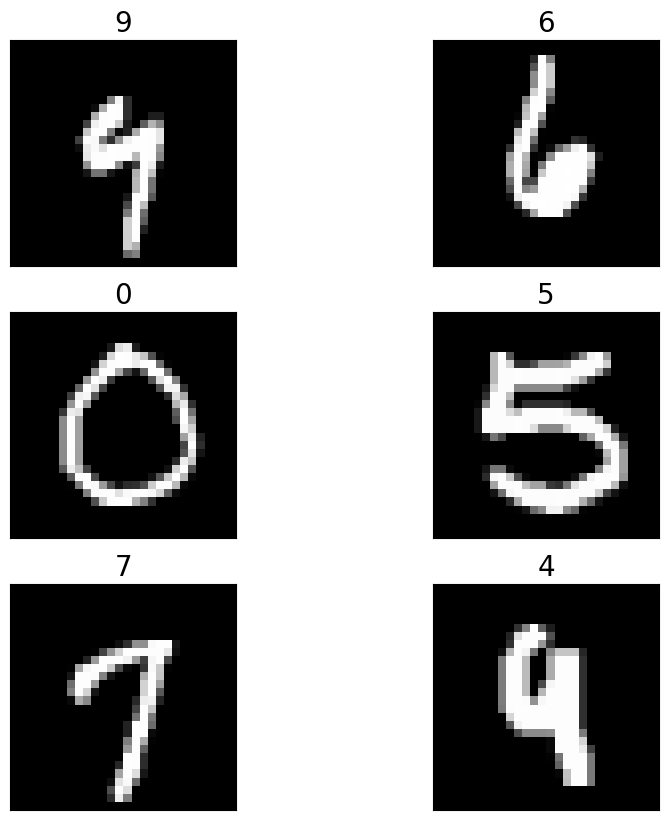

In [19]:
from tensorflow.keras.datasets import mnist
from tensorflow.data import Dataset
import matplotlib.pyplot as plt
%matplotlib inline

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# print(type(train_images))
# print(train_images.shape)
# print(train_labels.shape)
# print(test_images.shape)
# print(test_labels.shape)

train_ds = Dataset.from_tensor_slices((train_images, train_labels))
train_ds = train_ds.shuffle(60000).batch(9)

test_ds = Dataset.from_tensor_slices((test_images, test_labels))
test_ds = test_ds.batch(9)

train_ds_iter = iter(train_ds)
images, labels = next(train_ds_iter)

fig, axes = plt.subplots(3,2, figsize=(10,10))

# image 데이터를 가져옴. 
for ax_idx, ax in enumerate(axes.flat):
    image = images[ax_idx, ...]
    label = labels[ax_idx]

    ax.imshow(image.numpy(), 'gray')
    ax.set_title(label.numpy(), fontsize=20)

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


# dataset load 02

In [ ]:
# 그 전엔 keras에서 가져옴
# 이번에는 tensorflow에서 가져오기 

In [21]:
import tensorflow_datasets as tfds

dataset, ds_info = tfds.load(name='mnist',
                             shuffle_files = True,
                             with_info=True # info를 같이 출력해줌. 
                             )

print(ds_info)
print(ds_info.features)
print(ds_info.splits)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='/root/tensorflow_datasets/mnist/3.0.1.incompleteJ1WEUD',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
     

In [28]:
dataset= tfds.load(name='mnist',
                             shuffle_files = True,
                             )
# print(type(dataset))
# print(dataset.keys())

train_ds = dataset['train'].batch(32)
test_ds = dataset['test']

# print(type(train_ds))
# print(type(test_ds))

# 원래 하던 방식. 
for epoch in range(epochs):
    for data in train_ds:
        images = data['image']
        labels = data['label']


for tmp in train_ds:
    # print(type(tmp))

    # print(tmp.keys())
    images = tmp['image']
    labels = tmp['label']

    print(images.shape)
    print(labels.shape)
    break

(32, 28, 28, 1)
(32,)


In [30]:
dataset = tfds.load(name='mnist',
                    shuffle_files=True,
                    as_supervised=True)

train_ds = dataset['train'].batch(32)
test_ds = dataset['test']


for images, labels in train_ds:
    # tuple로 가져올 수 있음. 
    print(images.shape)
    print(labels.shape)
    break

(32, 28, 28, 1)
(32,)


In [ ]:
# 한번에 나누는 방법
(train_ds, test_ds), ds_info = tfds.load(name='mnist',
                                        shuffle_files=True,
                                        as_supervised=True
                                        split=['train', 'test'],
                                        with_info=True)

train_ds = train_ds.batch(32)

for images, labels in train_ds:
    print(images.shape)
    print(labels.shape)
    break



In [33]:
dataset, ds_info = tfds.load(name='patch_camelyon',
                            shuffle_files=True,
                            as_supervised=True,
                            with_info=True)
print(ds_info.featuers, '\n')
print(ds_info.splits)

In [ ]:
dataset, ds_info = tfds.load(name='patch_camelyon',
                            shuffle_files=True,
                            as_supervised=True,
                            spilt = ['train', 'validation']
                            with_info=True,
                            batch_size=9)

train_ds_iter = iter(train_ds)
images, labels = next(train_ds_iter)
images = images.numpy()
labels = labels.numpy()

import matplotlib.pyplot as plt
fig,axes = plt.subplots(3,3,figsize=(15,15))

for ax_idx, ax in enumerate(axes.flat):
    ax.imshow(images[ax_idx, ...])
    ax.set_title(labels[ax_idx], fontsize=30)

    ax.set_xaxis().set_visible(False)
    ax.set_yaxis().set_visible(False)



# data split

In [ ]:
# 데이터 셋 쪼개기

In [38]:
import tensorflow as tf
import tensorflow_datasets as tfds

train_x = np.arange(100).reshape(-1,1)
train_y = 3*train_x + 1

train_validation_ds = tf.data.Dataset.from_tensor_slices((train_x, train_y))

# tmp_ds = train_ds.take(10) # take API를 사용하여 데이터 셋 가져오기 
#                            # 10개를 뽑아서 넣는다 

# for x, y in tmp_ds:
#     print(x)
#     print(y, '\n')

n_train_validation = 100
train_ratio = 0.8
n_train = int(n_train_validation * train_ratio)

print(n_train_validation)
print(n_train)

train_ds = train_validation_ds.take(n_train) # 첫번째 80개만 가져오기. 


100
80


In [ ]:
n_train_validation = 100
train_ratio = 0.8
n_train = int(n_train_validation * train_ratio)
n_validation = n_train_validation - n_train

train_x = np.arange(100).reshape(-1,1)
train_y = 3*train_x + 1

train_validation_ds = tf.data.Dataset.from_tensor_slices((train_x, train_y))

remaining_ds = train_validation_ds.skip(10) # 10개를 건너뛰고 (생략하고) 출력. 
validation_ds = remaining_ds.take(n_validation)


for x,y in remaining_ds:
    print(x)
    print(y, '\n')
    

In [47]:
(train_validation_ds, test_ds), ds_info = tfds.load(name='mnist',
                                                    shuffle_files=True,
                                                    as_supervised=True,
                                                    split=['train', 'test'],
                                                    with_info=True)
print(ds_info.splits['train'].num_examples)
train_ratio=.8
n_train = int(n_train_validation * train_ratio)
n_validation = n_train_validation - n_train

train_ds = train_validation_ds.take(n_train)
remaining_ds = train_validation_ds.skip(n_train)
validation_ds = remaining_ds.take(n_validation)

train_ds = train_ds.shuffle(100).batch(32)
validation_ds = validation_ds.batch(32)
test_ds = test_ds.batch(32)

60000


# Dataset proprocessing

In [58]:
import tensorflow as tf
import tensorflow_datasets as tfds

train_ds = tfds.load(name='mnist',
                     shuffle_files=True,
                     as_supervised=True,
                     split='train',
                     batch_size=4)
for images, labels in train_ds:
    # print(images.shape)
    # print(images.dtype)

    # print(tf.reduce_max(images))
    # print(labels.shape)
    # print(labels.dtype)
    break

# standarization 함수 만들기
def standardization(images, labels):
    images = tf.cast(images, tf.float32) / 255
    return [images, labels]


# standardization 적용 전
train_ds_iter = iter(train_ds)
images, labels = next(train_ds_iter)
print(images.dtype, tf.reduce_max(images))

# standardization 적용 후
train_ds = train_ds.map(standardization)
train_ds_iter = iter(train_ds)
images, labels = next(train_ds_iter)
print(images.dtype, tf.reduce_max(images))




<dtype: 'uint8'> tf.Tensor(255, shape=(), dtype=uint8)
<dtype: 'float32'> tf.Tensor(1.0, shape=(), dtype=float32)


In [54]:
# map 활용
a = [1,2,3,4,5]
def double(in_val):
    return 2*in_val

doubled = list(map(double, a))
print(doubled)

# lambda 활용
doubled_2 = list(map(lambda x : 2*x, a))
print(doubled_2)

# tf.cast
t1 = tf.constant([1,2,3,4,5])
print(t1.dtype)
t2 = tf.cast(t1, tf.float32)
print(t2.dtype)

[2, 4, 6, 8, 10]
[2, 4, 6, 8, 10]
<dtype: 'int32'>
<dtype: 'float32'>


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

def minst_data_loader():

    def standardization(images, labels):
        images = tf.cast(images, tf.float32) / 255
        return [images, labels]


    train_ds, test_ds = tfds.load(name='mnist',
                        shuffle_files=True,
                        as_supervised=True,
                        split=['train', 'test'],
                        batch_size=4)

    train_ds = train_ds.map(standardization)
    test_ds = test_ds.map(standardization)
    return train_ds, test_ds


## Losses and Metrics

In [62]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.losses import SparseCategoricalCrossentropy

from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

# binary cross entropy

loss_object = BinaryCrossentropy()

predictions = np.array([0.3]).reshape(-1,1)
labels = np.array([1])

loss = loss_object(labels, predictions)
loss_manual = -1*(labels*np.log(predictions) + (1-labels)*np.log(1-predictions))

# print(loss.numpy())
# print(loss_manual)

# 2개의 샘플
predictions = np.array([0.3, 0.6]).reshape(-1,1)  # 마지막은 컬럼 벡터
labels = np.array([1,0]).reshape(-1,1)

loss = loss_object(labels, predictions)
loss_manual = -1*(labels*np.log(predictions) + (1-labels)*np.log(1-predictions))  # row wise로 계산이 됨
loss_manual = np.mean(loss_manual) # 마지막으로 평균을 구해야 됨

print(loss.numpy())
print(loss_manual)



1.0601314764334222
1.0601317681000455


In [71]:
predictions = np.array([[0.3, 0.7],
                        [0.4, 0.6],
                        [0.1, 0.9]])
labels = np.array([[0,1],
                   [1,0],
                   [1,0]])
loss = loss_object(labels, predictions)

loss_manual = -1*labels*np.log(predictions)
loss_manual = np.sum(loss_manual, axis=-1)
loss_manual = np.mean(loss_manual)
print(loss_manual)
print(loss.numpy())

1.1918502562689777
1.1918497919834439


In [75]:
# categorical cross entropy

loss_object = CategoricalCrossentropy()

predictions = np.array([[0.2, 0.1, 0.7],
                        [0.4, 0.3, 0.3],
                        [0.1, 0.8, 0.1]])
labels = np.array([[0,0,1],
                   [0,1,0],
                   [1,0,0]])
loss = loss_object(labels, predictions)

loss_manual = -1*labels*np.log(predictions)
loss_manual = np.sum(loss_manual, axis=1) 
loss_manual = np.mean(loss_manual)
print(loss_manual)


1.2877442804195713


In [8]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.losses import SparseCategoricalCrossentropy

from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

# SparseCategoricalCrossentropy

loss_object = SparseCategoricalCrossentropy()

predictions = np.array([[0.2, 0.1, 0.7],
                        [0.4, 0.3, 0.3],
                        [0.1, 0.8, 0.1]])
labels = np.array([2,1,0])

loss = loss_object(tf.constant(labels), tf.constant(predictions))

ce_loss = 0
for data_idx in range(len(labels)):
    prediction = predictions[data_idx]
    label = labels[data_idx]

    t_prediction = prediction[label]
    ce_loss += -1*np.log(t_prediction)
ce_loss = ce_loss / len(labels)

print(loss.numpy())
print(ce_loss)

1.2877442804195713
1.2877442804195713


In [ ]:
import tensorflow_datasets as tfds

train_ds = tfds.load(name='mnist',
                     shuffle_files=True,
                     as_supervised=True,
                     split='train')
train_ds = trainds.batch(8)

train_ds_iter = iter(train_ds)
images, labels = next(train_ds_iter) # sparse 모양으로 나오면 sparse categorical로 이용하기 

In [14]:
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

# categorical accuracy 
metric = CategoricalAccuracy()

predictions = np.array([[0.2, 0.2, 0.6], [0.1, 0.8, 0.1]])
labels = np.array([[0,0,1], [0,0,1]]) # one hot vector

acc = metric(labels, predictions)
print(acc*100)

# spare categorical accuracy 
metric = SparseCategoricalAccuracy()
predictions = np.array([[0.2, 0.2, 0.6], [0.1, 0.8, 0.1]])
labels = np.array([2,0]) # sparse vector 

acc = metric(labels, predictions)
print(acc*100)

tf.Tensor(50.0, shape=(), dtype=float32)
tf.Tensor(50.0, shape=(), dtype=float32)
